# SEP 740 - Assignment 3

In this assignment, we will explore the use of Recurrent Neural Networks (RNNs) and Long Short-Term Memory (LSTM) cells for processing sequential data. RNNs are designed to process sequential data, such as time-series, audio, or text data, by using feedback connections to incorporate previous context into the current prediction. LSTM cells are a type of RNN that can effectively handle the vanishing gradient problem in traditional RNNs and can remember longer-term dependencies.

For this assignment, we will use the IMDB dataset, which contains movie reviews labeled as positive or negative. We will use this dataset to train an RNN and an LSTM model to predict the sentiment of a movie review.

## Load the dataset
The IMDB dataset is included in Keras.

## A sample of the dataset

### Import Libraries

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import tensorflow
from keras.utils import pad_sequences
from sklearn.model_selection import GridSearchCV, train_test_split
from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, SimpleRNN, Activation
from keras.optimizers import RMSprop
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from keras.preprocessing.text import Tokenizer

In [130]:
# Code adapted from https://stackoverflow.com/questions/42821330/restore-original-text-from-keras-s-imdb-dataset#44891281


NUM_WORDS=1000 # only use top 1000 words
INDEX_FROM=3   # word index offset

(x_train, y_train), (x_test, y_test) = tensorflow.keras.datasets.imdb.load_data(num_words=NUM_WORDS, index_from=INDEX_FROM)

word_to_id = tensorflow.keras.datasets.imdb.get_word_index()
word_to_id = {k:(v+INDEX_FROM) for k,v in word_to_id.items()}

word_to_id["<PAD>"] = 0
word_to_id["<START>"] = 1
word_to_id["<UNK>"] = 2
word_to_id["<UNUSED>"] = 3

id_to_word = {value:key for key, value in word_to_id.items()}
print(' '.join(id_to_word[id] for id in x_train[0] ))

<START> this film was just brilliant casting <UNK> <UNK> story direction <UNK> really <UNK> the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same <UNK> <UNK> as myself so i loved the fact there was a real <UNK> with this film the <UNK> <UNK> throughout the film were great it was just brilliant so much that i <UNK> the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the <UNK> <UNK> was amazing really <UNK> at the end it was so sad and you know what they say if you <UNK> at a film it must have been good and this definitely was also <UNK> to the two little <UNK> that played the <UNK> of <UNK> and paul they were just brilliant children are often left out of the <UNK> <UNK> i think because the stars that play them all <UNK> up are such a big <UNK> for the whole film but these children are amazing and should be <UNK> for what they have done don't yo

## Preprocess the data **[10 Points]**
The input to an RNN or LSTM model needs to have a fixed sequence length, but the movie reviews in the IMDB dataset have variable lengths. Therefore, we need to preprocess the data by:

*   Truncating or padding each movie review to have the same length.
*   One-hot encoding the reviews to represent them as fixed-length vectors.

In [131]:
# Padding the Data so that the max words in the review is 1000

max_words = 1000

x_train = pad_sequences(x_train, maxlen=max_words)
x_test = pad_sequences(x_test, maxlen=max_words)

print(' '.join(id_to_word[id] for id in x_train[0] ))

<PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD

## Split the training dataset **[10 Points]**
A common method for ensuring the generalization of the model is to split the training dataset two chucks, **train**, **validation**, and **test**.

In [132]:
#Doing a 90:10 split for Train Validation set

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,test_size=0.10)

## Design your model **[25 Points]**

Your first task is to design and train an RNN model to predict the sentiment of a movie review. Your model should consist of an embedding layer followed by a RNN layers and a dense output layer with sigmoid activation.

In [133]:
# Building a Sequential Model with first an Embedding Layer then a Simple RNN Layer and then finally a Dense Layer

embedding_size=32

model = Sequential([Embedding(NUM_WORDS, embedding_size, input_length=max_words),
                    SimpleRNN(16,input_shape = (NUM_WORDS,max_words), return_sequences=False,activation='relu'),
                    Dense(1, activation='sigmoid')
                    ])

model.summary()

model.compile(optimizer = "rmsprop" , loss = "binary_crossentropy", metrics=["acc"])

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 1000, 32)          32000     
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 16)                784       
                                                                 
 dense_8 (Dense)             (None, 1)                 17        
                                                                 
Total params: 32,801
Trainable params: 32,801
Non-trainable params: 0
_________________________________________________________________


## Train your model **[20 Points]**
Use the training set to train the model and use the validation set to monitor the traning process. Make sure to use an appropriate loss function considering your task (classification) and model architecure.

In [134]:
# Fit the model to the traning set

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(x_train,y_train, validation_data = (x_val,y_val), epochs = 5, batch_size = 128, verbose = 1, callbacks=[early_stop])

Epoch 1/5
176/176 [==============================] - 38s 205ms/step - loss: 0.6256 - acc: 0.6658 - val_loss: 0.5735 - val_acc: 0.7376
Epoch 2/5
176/176 [==============================] - 35s 201ms/step - loss: 1.0516 - acc: 0.7787 - val_loss: 0.4290 - val_acc: 0.8084
Epoch 3/5
176/176 [==============================] - 35s 200ms/step - loss: 0.4991 - acc: 0.8192 - val_loss: 0.4067 - val_acc: 0.8200
Epoch 4/5
176/176 [==============================] - 36s 202ms/step - loss: 0.4349 - acc: 0.8405 - val_loss: 0.3729 - val_acc: 0.8288
Epoch 5/5
176/176 [==============================] - 36s 204ms/step - loss: 0.3938 - acc: 0.8429 - val_loss: 0.3324 - val_acc: 0.8588


## Plot the loss **[10 Points]**

Plot the trend of training loss and validation loss with respect to epochs. You should use visualization libraries (e.g. matplotlib, seaborn) to show these plots.

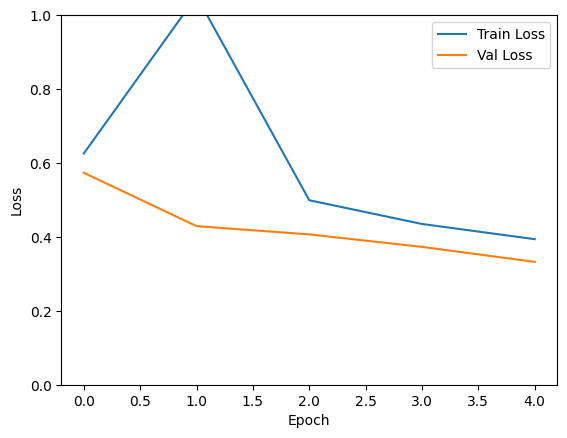

In [135]:
hist = pd.DataFrame(history.history)

def plot_history():
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['loss'], label='Train Loss')
    plt.plot(hist['val_loss'], label='Val Loss')
    plt.legend()
    plt.ylim([0, 1])

plot_history()

## Test the model on the test set **[10 Points]**
Compute accuracy, F1 macro, precision, and recall scores of the model. You can use functions available in machine learning libraries such as `scikit-learn` to compute these metrics.

In [136]:
# Using the model to predict our test data

predictions = (model.predict(x_test) > 0.5).astype("int32")

target_names = ['positive', 'negative']

cnf_matrix_test = confusion_matrix(y_test, predictions)
print(classification_report(y_test, predictions, target_names=target_names))

print("Confusion Matrix:")
print(cnf_matrix_test)

782/782 [==============================] - 30s 36ms/step
              precision    recall  f1-score   support

    positive       0.85      0.86      0.86     12500
    negative       0.86      0.85      0.85     12500

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000

Confusion Matrix:
[[10734  1766]
 [ 1861 10639]]


## See your model in action! **[15 Points]**

In this section, you will evaluate your model's performance by testing it on a featured review from the IMDB page of "Avatar: The Way of Water 2022". Before feeding the review to the model, you will need to carry out any necessary preprocessing. Then, the model will output the likelihood of the message being a positive or negative review.

In [140]:
avatar_review = "I decided to rewatch the first Avatar last night before watching Avatar 2 and I am always in awe of how stunning the visuals are; \
                 it was a crowd-pleaser and more agreeable for the general audience. However, with the first Avatar, the story was basic and \
                 simple it was rather forgettable. The thing is, the Avatar franchise has a simple story but it was told grandly. 'Avatar: The \
                 Way of Water' was a captivating visual feast, with every attempt beautifully framed via painstakingly flawless CGI, but the \
                 message about protecting your loved ones is not new to us, but it was ingenious. James Cameron's level of perfectionism translates \
                 to the audience; the details of every frame are precise and I can't help but wonder how on earth he has done that. It is the simple \
                 plot accompanied by such technical achievement that has always been the formula for almost all of Cameron's movies, not just Avatar. \
                 Simplicity is not a bad thing. Just like in the first Avatar, characters are established a lot, and there is not much emotional \
                 attachment during the first half. However, the thrill and excitement peaked during the second act were worth it. This is the trick \
                 for most highly-budget films, they will entice you with visual and technical achievement, but the story is not that grand nor special \
                 for the audience to keep talking about it in the next 5 years. The Pandora world Cameron takes us to is excellent and magnificently \
                 conceptualized, but the story is missing the emotional draw that made this film a pretentious masterpiece. Though the visuals are \
                 still magnificent, it's difficult this time not to recognize the repetition of the story and the limited character arcs the movie \
                 presented. You will remember Avatar---aside from blue people---as a movie with impeccable and out-of-this-world visuals, but the \
                 story remains forgettable.  Some films are just pure escapism and sometimes that's what audiences need, and this is what Avatar 2 \
                 delivered. Avatar 2 doesn't necessarily check all those boxes to become a great film, but what it does right will offer viewers \
                 moments of astonishment, full-body immersion, and beauty. You can easily watch the movie and points out its mistakes and flaws, but \
                 it is hard to resist the fun and adventure the film delivers throughout its 192 minutes runtime. It is clear that James Cameron is \
                 making this movie for a general audience, and while imperfect, it certainly seems to serve its purpose."

# Removing Extra Spaces
avatar_review = ' '.join(avatar_review.split())

# Removing Special Characters except mentioned below
allowed_chars = "abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'- "
avatar_review = ''.join([char for char in avatar_review if char in allowed_chars])

# Lowering Case and Splitting the string into a list of words
avatar_review = avatar_review.lower()
avatar_review = list(avatar_review.split(" "))

# Removing words that are not present in the word index
avatar_review = [word_to_id[word] for word in avatar_review if word in word_to_id]

# Converting List into a Sequence
avatar_review = [avatar_review]

# Changing the letters not in dictionary to [unk] i.e. 3
for i, sequence in enumerate(avatar_review):
    for j, index in enumerate(sequence):
        if index >= NUM_WORDS:
            avatar_review[i][j] = 2

print(' '.join(id_to_word[id] for id in avatar_review[0] ))

# Padding Sequences
avatar_review = pad_sequences(avatar_review, maxlen=max_words)
print(' '.join(id_to_word[id] for id in avatar_review[0] ))

# Prediction Using Built Model
pre = (model.predict(avatar_review) > 0.5).astype("int32")
print("Positive" if pre else "Negative")

i decided to <UNK> the first <UNK> last night before watching <UNK> 2 and i am always in <UNK> of how <UNK> the <UNK> are it was a and more <UNK> for the general audience however with the first <UNK> the story was <UNK> and simple it was rather <UNK> the thing is the <UNK> <UNK> has a simple story but it was told <UNK> the way of <UNK> was a <UNK> <UNK> <UNK> with every attempt <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> but the message about <UNK> your loved ones is not new to us but it was <UNK> james <UNK> level of <UNK> <UNK> to the audience the <UNK> of every <UNK> are <UNK> and i can't help but wonder how on earth he has done that it is the simple plot <UNK> by such <UNK> <UNK> that has always been the <UNK> for almost all of <UNK> movies not just <UNK> <UNK> is not a bad thing just like in the first <UNK> characters are <UNK> a lot and there is not much emotional <UNK> during the first half however the <UNK> and <UNK> <UNK> during the second act were worth it this is the <UNK> for most 

# Try the same with LSTM **[Extra 15 Points]**
Design, train, and evaluate a new model using LSTM. Then, compare the model's performance with the previous one.

### Desigining Model

In [125]:
#Designing Model for LSTM

embedding_size = 32

model = Sequential([Embedding(NUM_WORDS, embedding_size, input_length=max_words),
                    LSTM(64,dropout = 0.2, recurrent_dropout = 0.2),
                    Dense(1, activation='sigmoid')
                    ])

model.summary()

model.compile(optimizer = "rmsprop" , loss = "binary_crossentropy", metrics=["acc"])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 1000, 32)          32000     
                                                                 
 lstm_2 (LSTM)               (None, 64)                24832     
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 56,897
Trainable params: 56,897
Non-trainable params: 0
_________________________________________________________________


### Training Model

In [126]:
# Fit the model to the traning set

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(x_train,y_train, validation_data = (x_val,y_val), epochs = 5, batch_size = 32, verbose = 1, callbacks=[early_stop])

Epoch 1/5
782/782 [==============================] - 629s 795ms/step - loss: 0.5022 - acc: 0.7475 - val_loss: 0.3611 - val_acc: 0.8508
Epoch 2/5
782/782 [==============================] - 554s 708ms/step - loss: 0.3862 - acc: 0.8370 - val_loss: 0.3680 - val_acc: 0.8400
Epoch 3/5
782/782 [==============================] - 566s 724ms/step - loss: 0.3627 - acc: 0.8490 - val_loss: 0.3766 - val_acc: 0.8616
Epoch 4/5
782/782 [==============================] - 544s 696ms/step - loss: 0.3469 - acc: 0.8578 - val_loss: 0.3631 - val_acc: 0.8600
Epoch 5/5
782/782 [==============================] - 519s 663ms/step - loss: 0.3384 - acc: 0.8584 - val_loss: 0.3113 - val_acc: 0.8772


### Plotting Loss

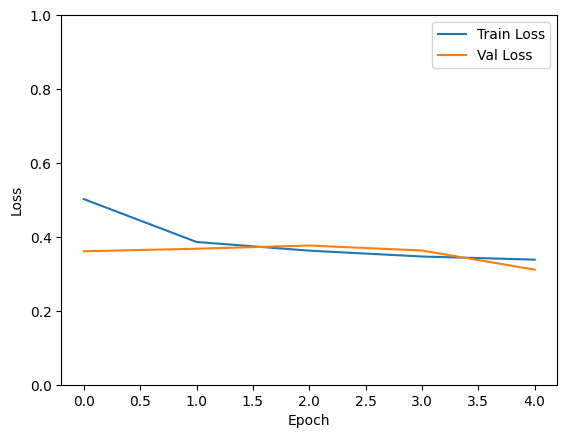

In [127]:
hist = pd.DataFrame(history.history)

def plot_history():
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['loss'], label='Train Loss')
    plt.plot(hist['val_loss'], label='Val Loss')
    plt.legend()
    plt.ylim([0, 1])

plot_history()

### Testing Model on Test Set

In [128]:
# Using the model to predict our test data

predictions = (model.predict(x_test) > 0.5).astype("int32")

target_names = ['positive', 'negative']

cnf_matrix_test = confusion_matrix(y_test, predictions)
print(classification_report(y_test, predictions, target_names=target_names))

print("Confusion Matrix:")
print(cnf_matrix_test)

782/782 [==============================] - 80s 101ms/step
              precision    recall  f1-score   support

    positive       0.86      0.87      0.86     12500
    negative       0.87      0.86      0.86     12500

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000

Confusion Matrix:
[[10829  1671]
 [ 1779 10721]]
